In [6]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import pickle
import mplhep as hep
import math
from tabulate import tabulate
import itertools
import warnings
import json
import scipy
from plot_utils import *
import fill_utils

warnings.filterwarnings('ignore')
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'

In [2]:
# parameters
output_label = '/home/submit/' + os.environ['USER'] + '/public_html/SUEP/analysis/debug/'
file_ext = '.png'

In [8]:
# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

# This part is meant to be flxeible, depending on what you want to import
# dimensions of plots: (sample) x (plot label)
# N.B.: lumis are applied through loader()

# input .pkl files
plotDir = '/work/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
infile_names = glob.glob(plotDir+'*.pkl')

offline_files_SUEP = [f for f in infile_names if "sys_studies_v5.pkl" in f and ('SUEP-m' in f)]
plots_SUEP = loader(offline_files_SUEP, apply_lumis=True, exclude_low_bins=True)
offline_files_2018 = [f for f in infile_names if "sys_studies_v5.pkl" in f and ('20UL18' in f)]
plots_2018 = loader(offline_files_2018, apply_lumis=True, exclude_low_bins=True)
# put everything in one dictionary
plots = {}

for key in plots_SUEP.keys(): plots[key] = fill_utils.apply_normalization(plots_SUEP[key], fill_utils.getXSection(key + '+RunIIAutumn18-private+MINIAODSIM', '2018', SUEP=True))
for key in plots_2018.keys(): plots[key+"_2018"] = plots_2018[key]

Should you want to, apply a further normalization here.

In [10]:
mu = 1

plots_SUEP['SUEP-m125-generic-htcut'] = fill_utils.apply_normalization(plots_SUEP['SUEP-m125-generic-htcut'], mu)

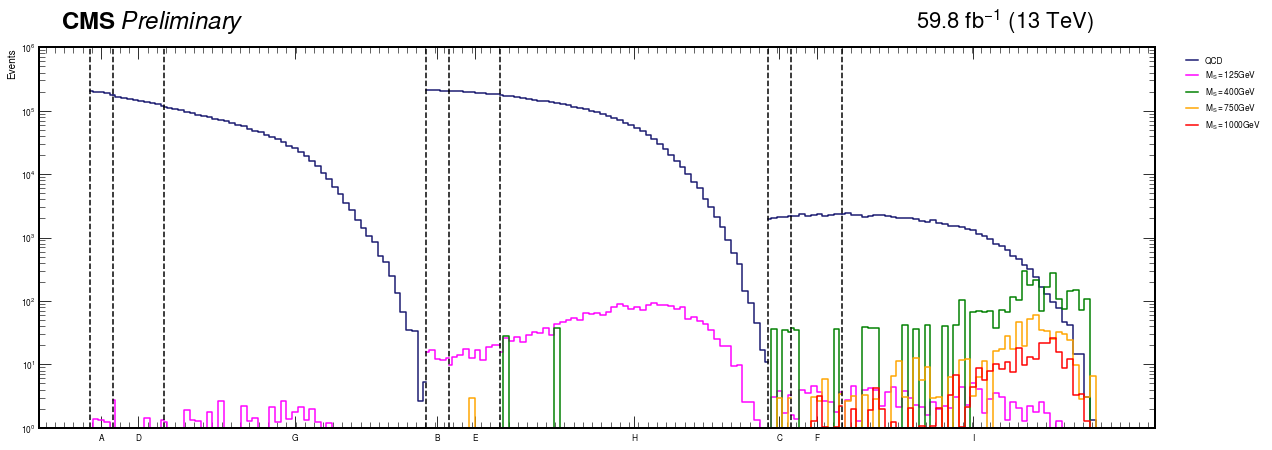

In [11]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2018'
plot_labels = ['SUEP_S1_Cluster']
samples = ['QCD_HT_'+year, 'SUEP-m125-generic-htcut', 'SUEP-m400-generic',
          'SUEP-m750-generic', 'SUEP-m1000-generic']
labels = ['QCD', r'$M_{S} = 125 GeV$', r'$M_{S} = 400 GeV$',
          r'$M_{S} = 750 GeV$', r'$M_{S} = 1000 GeV$']
for plot_label in plot_labels:
    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    #ax.legend(labels=['QCD','Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    cms = ax.text(
        -0.05, 2000000., u"CMS $\it{Preliminary}$",
        fontsize=24, fontweight='bold',
    )

    lumi = ax.text(
        1.45, 2000000., r"%.1f fb$^{-1}$ (13 TeV)" % round(lumiLabel(year),1),
        fontsize=22, 
    )
    ax.set_ylim(1e0, 1e6)
    #ax.set_xlabel(r"$Sph_1$")
    #fig.savefig(AN_label.format('contamination_'+year), bbox_inches='tight')
    #fig.savefig(output_label + 'contamination_' + year + file_ext, bbox_inches='tight')

Print contamination table, % of SUEP to QCD in each region.

In [12]:
regions = 'ABCDEFGH'

for year in ['2018']:
    QCD_sample = 'QCD_HT_'+year
    for label, sample in zip(labels, samples):
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label]
            hQCD = plots[QCD_sample][region + "_" + plot_label]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
        print(line)
    print()

QCD & $100.0\pm0.14$ & $100.0\pm0.14$ & $100.0\pm1.39$ & $100.0\pm0.12$ & $100.0\pm0.1$ & $100.0\pm0.94$ & $100.0\pm0.11$ & $100.0\pm0.08$ \\
$M_{S} = 125 GeV$ & $0.0\pm0.0$ & $0.01\pm0.0$ & $0.12\pm0.03$ & $0.0\pm0.0$ & $0.01\pm0.0$ & $0.13\pm0.02$ & $0.0\pm0.0$ & $0.07\pm0.0$ \\
$M_{S} = 400 GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $1.0\pm0.1$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.48\pm0.05$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$M_{S} = 750 GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.06\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.07\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$M_{S} = 1000 GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.04\pm0.01$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\

